<a href="https://colab.research.google.com/github/Sakshi1007/Uplift-ML-Phase-1-Assignments/blob/main/Titanic_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



[Link to Download the Titanic dataset](https://www.kaggle.com/c/titanic/data)

**Author**:
 Sakshi Singh

**Reach out**:
[Email](mailto:singhsakshi.7980@gmail.com)  | [LinkedIn](https://www.linkedin.com/in/sakshi-singh-1318b01ab/)


In [386]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [387]:
cd'/content/drive/MyDrive/ColabNotebooks/MLnow()'

/content/drive/MyDrive/ColabNotebooks/MLnow()


In [388]:
ls

ClaenMathData.csv  cleanedMathData.csv  train.csv
cleanedData.csv    model_01.h5          univariate_MathData_2.csv


In [389]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [390]:
data = pd.read_csv('train.csv', sep=',')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [391]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [392]:
data['Embarked'].fillna('S',inplace=True)


In [393]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [394]:
data.fillna(0, inplace=True)
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [395]:
for i in data:
  print(i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [396]:
print(f'Pclass: {data.Pclass.unique()}')
print(f'Sex: {data.Sex.unique()}')
print(f'SibSp: {data.SibSp.unique()}') # siblings or spouse
print(f'Parch: {data.Parch.unique()}') # Parents or Children
print(f'Embarked: {data.Embarked.unique()}')

Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q']


In [397]:
#Converting numeric to categorical

data['Sex'] = data['Sex'].apply({'male':1, 'female':0}.get)
data['Embarked'] = data['Embarked'].apply({'S':1, 'C':2, 'Q':3, np.nan:0}.get)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,3
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,2


In [398]:
data_updated =data[['Pclass', 'Sex','Age' ,'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
data_updated.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,1,0
1,1,0,38.0,1,0,71.2833,2,1
2,3,0,26.0,0,0,7.9250,1,1
3,1,0,35.0,1,0,53.1000,1,1
4,3,1,35.0,0,0,8.0500,1,0
5,3,1,0.0,0,0,8.4583,3,0
6,1,1,54.0,0,0,51.8625,1,0
7,3,1,2.0,3,1,21.0750,1,0
8,3,0,27.0,0,2,11.1333,1,1
9,2,0,14.0,1,0,30.0708,2,1


In [399]:
data_updated.to_csv('cleanedData.csv')

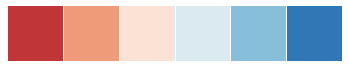

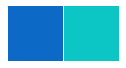

In [400]:
#To visualize our results 

import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette("RdBu"))
pal = sns.color_palette('RdBu', 6)
pal.as_hex()
plt.style.use(['seaborn'])
sns_colors = ["#0c69c6", "#0cc6c6"]
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

## EDA

In [401]:
print(data_updated.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')


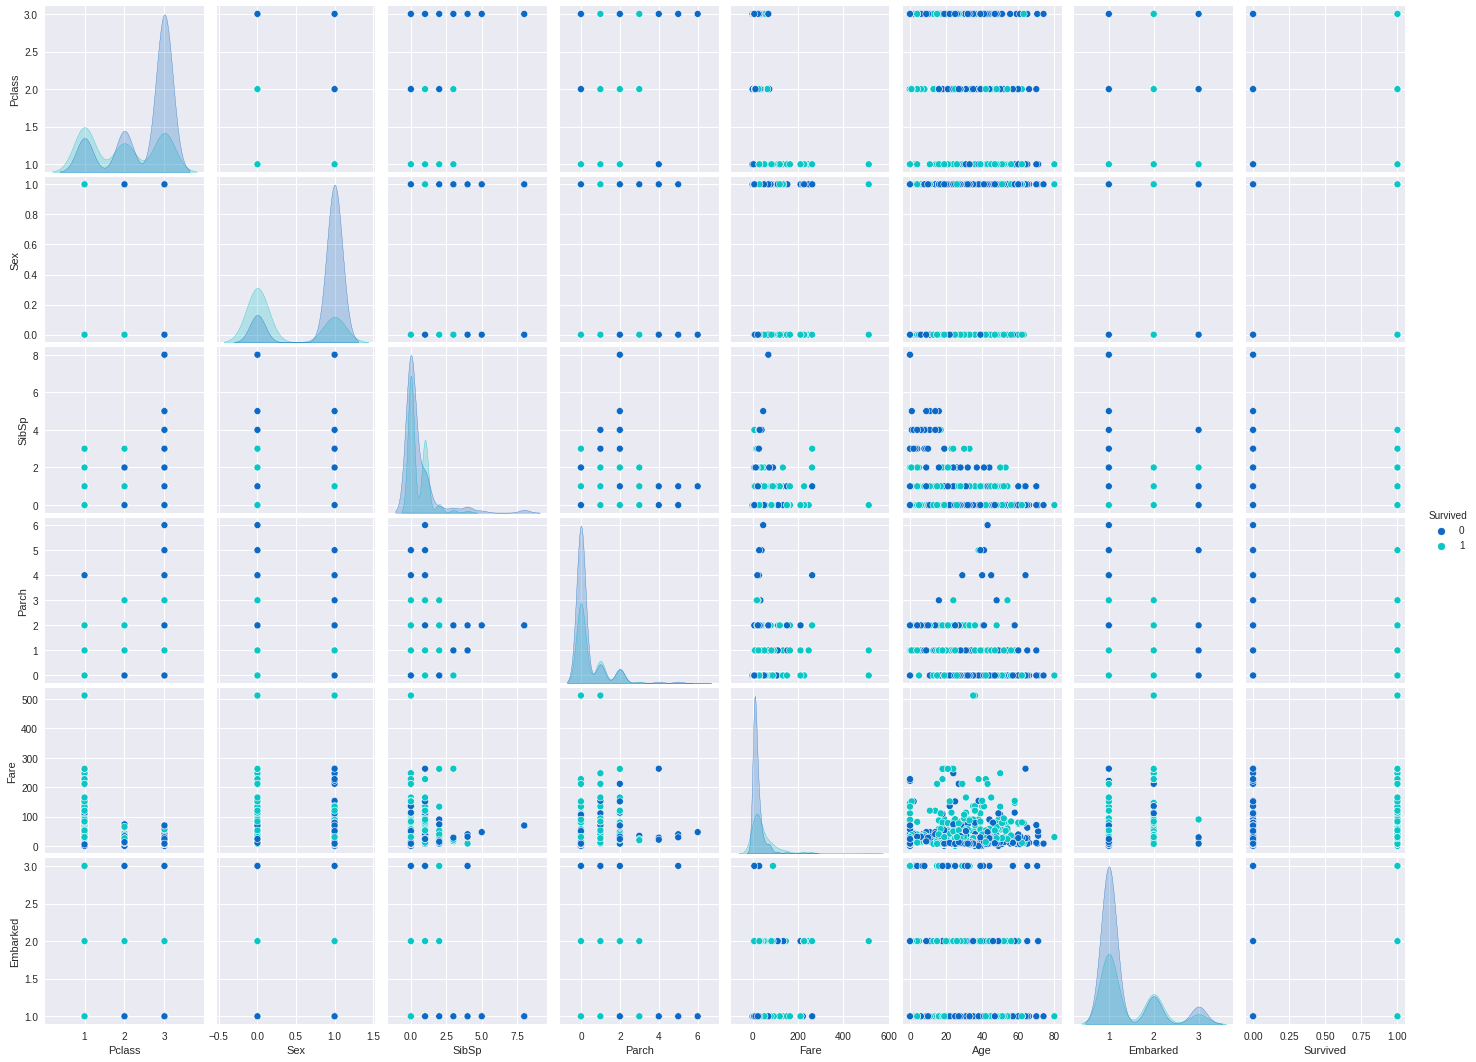

In [402]:
sns.pairplot(data_updated,
             x_vars=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age','Embarked', 'Survived'],
             y_vars=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'],
             hue='Survived', diag_kind='kde')

In [403]:
data_updated['Family']=data_updated['SibSp']+data_updated['Parch']
data_updated.drop(['SibSp','Parch'],axis=1,inplace=True)
data_updated.columns


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Survived', 'Family'], dtype='object')

In [404]:
data_updated.head(10)

,Pclass,Sex,Age,Fare,Embarked,Survived,Family
0,3,1,22.0,7.2500,1,0,1
1,1,0,38.0,71.2833,2,1,1
2,3,0,26.0,7.9250,1,1,0
3,1,0,35.0,53.1000,1,1,1
4,3,1,35.0,8.0500,1,0,0
5,3,1,0.0,8.4583,3,0,0
6,1,1,54.0,51.8625,1,0,0
7,3,1,2.0,21.0750,1,0,4
8,3,0,27.0,11.1333,1,1,2
9,2,0,14.0,30.0708,2,1,1


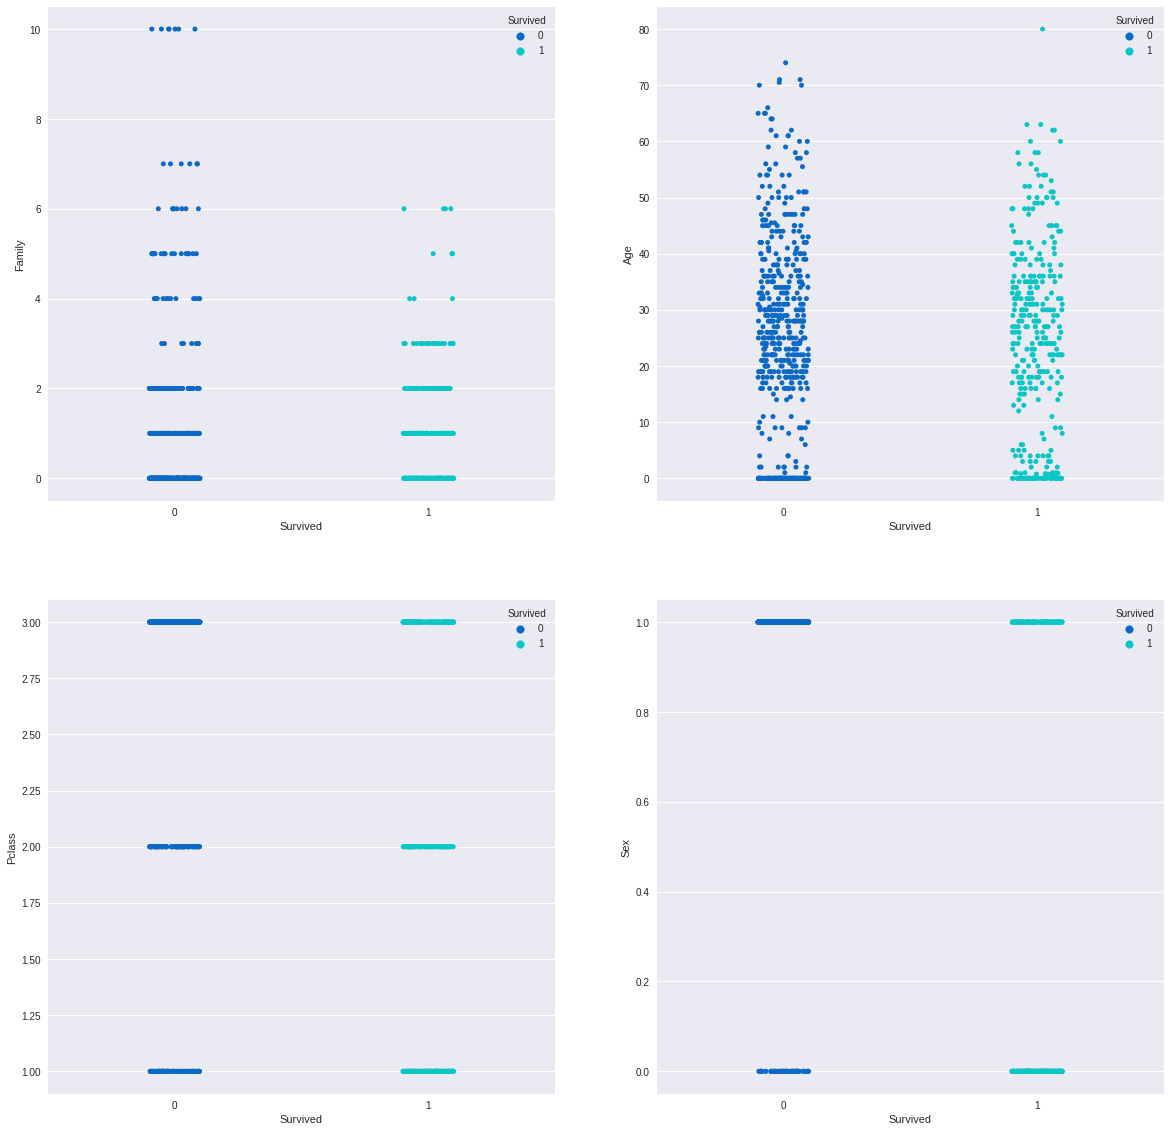

In [405]:
#strip plot

fig, axarr = plt.subplots(2, 2, figsize=(20, 20))
sns.stripplot(y='Family',x='Survived', data=data_updated, hue='Survived', ax=axarr[0][0])
sns.stripplot(y='Age',x='Survived', data=data_updated, hue='Survived', ax=axarr[0][1])
sns.stripplot(y='Pclass',x='Survived', data=data_updated, hue='Survived', ax=axarr[1][0])
sns.stripplot(y='Sex',x='Survived', data=data_updated, hue='Survived', ax=axarr[1][1])

## Data split

In [406]:
trainDataset = data_updated.sample(frac=0.8, random_state=0)
validationDataset = data_updated.drop(trainDataset.index)

The validation data/features are the 80% from the `trainData` --> That is not the test.csv file, it does not have the survived column

In [407]:
print(trainDataset.shape)
print(validationDataset.shape)
print(trainDataset.head())
print(validationDataset.head())

(713, 7)
(178, 7)
     Pclass  Sex   Age      Fare  Embarked  Survived  Family
495       3    1   0.0   14.4583         2         0       0
648       3    1   0.0    7.5500         1         0       0
278       3    1   7.0   29.1250         3         0       5
31        1    0   0.0  146.5208         2         1       1
255       3    0  29.0   15.2458         2         1       2
    Pclass  Sex   Age     Fare  Embarked  Survived  Family
9        2    0  14.0  30.0708         2         1       1
11       1    0  58.0  26.5500         1         1       0
19       3    0   0.0   7.2250         2         1       0
23       1    1  28.0  35.5000         1         1       0
28       3    0   0.0   7.8792         3         1       0


In [408]:
trainFeatures = trainDataset.copy()
validationFeatures = validationDataset.copy()

print(trainFeatures.head())
print(validationFeatures.head())

     Pclass  Sex   Age      Fare  Embarked  Survived  Family
495       3    1   0.0   14.4583         2         0       0
648       3    1   0.0    7.5500         1         0       0
278       3    1   7.0   29.1250         3         0       5
31        1    0   0.0  146.5208         2         1       1
255       3    0  29.0   15.2458         2         1       2
    Pclass  Sex   Age     Fare  Embarked  Survived  Family
9        2    0  14.0  30.0708         2         1       1
11       1    0  58.0  26.5500         1         1       0
19       3    0   0.0   7.2250         2         1       0
23       1    1  28.0  35.5000         1         1       0
28       3    0   0.0   7.8792         3         1       0


In [409]:
 trainLabels = trainFeatures.pop('Survived')
 validationLabels = validationFeatures.pop('Survived')

print(trainLabels.head())
print(validationLabels.head())

495    0
648    0
278    0
31     1
255    1
Name: Survived, dtype: int64
9     1
11    1
19    1
23    1
28    1
Name: Survived, dtype: int64


In [410]:
print(trainFeatures.head())
print(validationFeatures.head())

     Pclass  Sex   Age      Fare  Embarked  Family
495       3    1   0.0   14.4583         2       0
648       3    1   0.0    7.5500         1       0
278       3    1   7.0   29.1250         3       5
31        1    0   0.0  146.5208         2       1
255       3    0  29.0   15.2458         2       2
    Pclass  Sex   Age     Fare  Embarked  Family
9        2    0  14.0  30.0708         2       1
11       1    0  58.0  26.5500         1       0
19       3    0   0.0   7.2250         2       0
23       1    1  28.0  35.5000         1       0
28       3    0   0.0   7.8792         3       0


## Problem Statement

Create a classification model to predict the survival rate.

In [411]:
print(len(trainFeatures.columns))

6


In [412]:
import math
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil(2*(numFeatures)/3)
print(inputNeurons)

4


In [413]:
# ---- Model-1 ----
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = inputNeurons, activation = 'relu'),#input layer
                             tf.keras.layers.Dense(units = 2*inputNeurons, activation='relu'), #only hidden layer should be more than 1 
                             tf.keras.layers.Dense(1, activation='sigmoid') #output layer
])

In [414]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [415]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100)

In [416]:
numEpochs = 1000
history = model.fit(trainFeatures, trainLabels, epochs=numEpochs,validation_data=(validationFeatures,validationLabels),callbacks=[early_stopping])
# history = model.fit(trainFeatures, trainLabels, epochs=numEpochs)

Epoch 1/1000
23/23 [==============================] - 1s 9ms/step - loss: 0.8388 - accuracy: 0.6662 - val_loss: 0.7660 - val_accuracy: 0.5730
Epoch 2/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.7051 - accuracy: 0.6620 - val_loss: 0.7143 - val_accuracy: 0.6124
Epoch 3/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.6410 - val_loss: 0.7057 - val_accuracy: 0.6180
Epoch 4/1000
23/23 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.6844 - val_loss: 0.6883 - val_accuracy: 0.6236
Epoch 5/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.6816 - val_loss: 0.6803 - val_accuracy: 0.6180
Epoch 6/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6971 - val_loss: 0.6621 - val_accuracy: 0.6236
Epoch 7/1000
23/23 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.7013 - val_loss: 0.6515 - val_accuracy: 0.6292
Epoch 

In [417]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 9         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


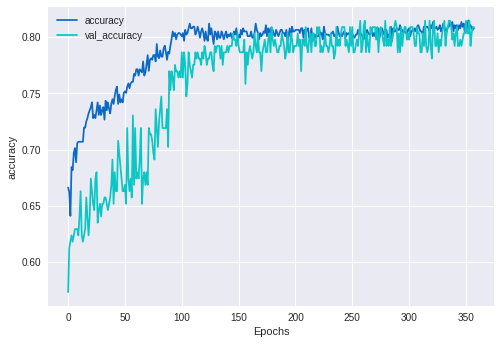

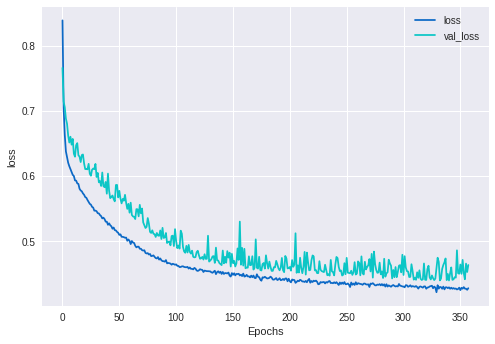

In [418]:
def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


pltGr(history, 'accuracy')
pltGr(history, 'loss')

In [419]:
 def predPlot(labels, preds):
   plt.scatter(labels, preds)
   plt.xlabel('True-Values/Labels')
   plt.ylabel('Predicted-Values')
   plt.axis('equal')
   plt.axis('square')
   #plt.xlim([0,plt.xlim()[1]])
   #plt.ylim([0,plt.ylim()[1]])
   plt.plot([-100,100],[-100,100])
   plt.show()

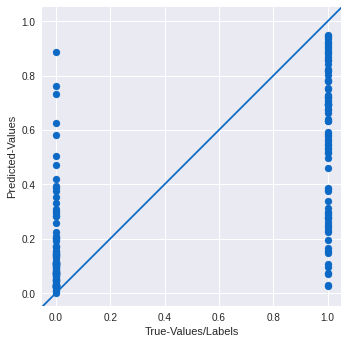

In [420]:

testPreds = model.predict(validationFeatures).flatten()

predPlot(validationLabels, testPreds)

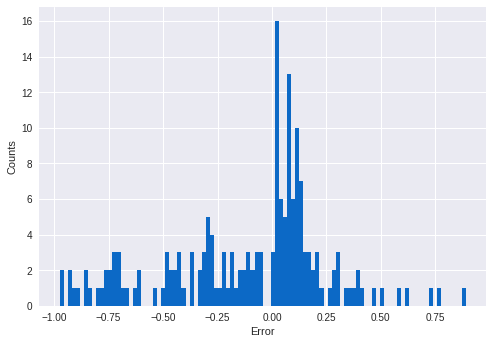

In [421]:
def errorPlot(preds, labels, binVal):
  errors = preds - labels
  plt.hist(errors, bins=binVal)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, validationLabels, 100)